In [ ]:
using Plots; pyplot!()

In [ ]:
plotter()
Plots.PyPlot.ioff()

In [ ]:
plot(rand(10))

In [7]:
using Plots
plotDefault!(:size,(400,300));

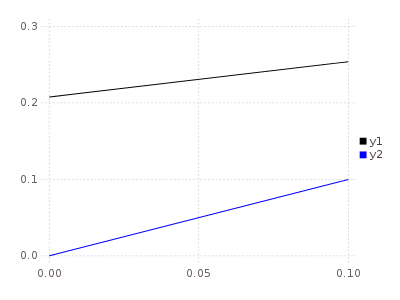

In [8]:
plt = plot([0,0.1], Any[rand(2),sin])

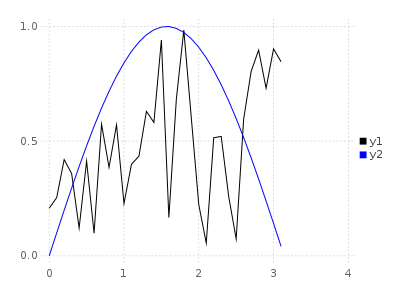

In [9]:
for x in 0.2:0.1:π
    push!(plt, 1, x, rand())
    push!(plt, 2, x, sin(x))
end
plt

In [ ]:
plt